In [1]:
from time import time
from collections import deque

## 链表总结（13题）
#### 1. 双指针：比如同时操作前后俩节点的时候
#### 2. 快慢指针：环形链表相交问题，找链表中点问题，都可是让fast前进两步，slow前进一步
#### 3. 虚拟头结点：当需要将头结点也按照普通节点一样处理的时候
#### 4. 注意链表的终点问题，否则会时不时报错None没有val，在循环中报错，哈哈
#### 参考 
[代码随想录](https://programmercarl.com/%E9%93%BE%E8%A1%A8%E7%90%86%E8%AE%BA%E5%9F%BA%E7%A1%80.html#%E5%8D%95%E9%93%BE%E8%A1%A8),
[CS-Notes](http://www.cyc2018.xyz/%E7%AE%97%E6%B3%95/Leetcode%20%E9%A2%98%E8%A7%A3/Leetcode%20%E9%A2%98%E8%A7%A3%20-%20%E9%93%BE%E8%A1%A8.html#_1-%E6%89%BE%E5%87%BA%E4%B8%A4%E4%B8%AA%E9%93%BE%E8%A1%A8%E7%9A%84%E4%BA%A4%E7%82%B9)

In [2]:
# 定义链表节点
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

### LC.203 [移除链表](https://leetcode.cn/problems/remove-linked-list-elements/)
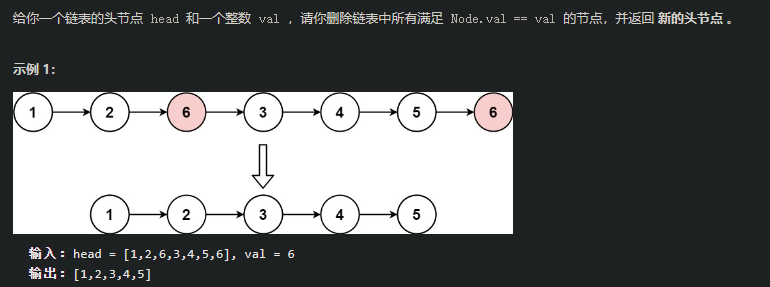

In [3]:
# 在删除节点时要一次将“挨着的”节点都删除了，当然，也不一定非用这种做法
def lc203(head,val):
    pre = ListNode(next=head)
    tmp = pre
    while tmp:
        # 将符合的条件的节点都删除了
        while tmp.next and tmp.next.val == val:
                tmp.next = tmp.next.next
        tmp = tmp.next
    return pre.next

### LC.206 [翻转链表](https://leetcode.cn/problems/reverse-linked-list/)
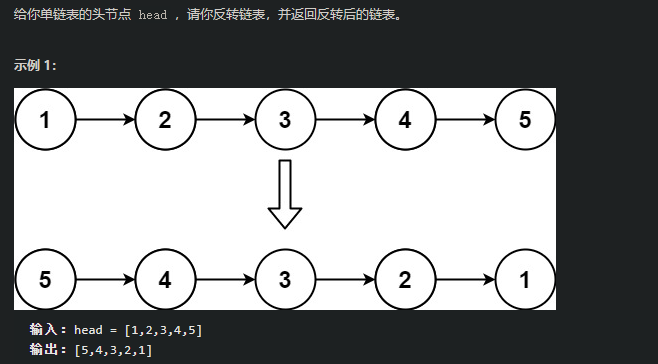

In [4]:
# 双指针，指向相邻两个节点
# 虚拟头结点
def lc206(head):
    pre,cur = None,head
    while cur:
        # 转向
        tmp = cur.next
        cur.next = pre
        # 往前走一步
        pre = cur
        cur = tmp
    return pre

### LC.24 [两两交换链表中的节点](https://leetcode.cn/problems/swap-nodes-in-pairs/)
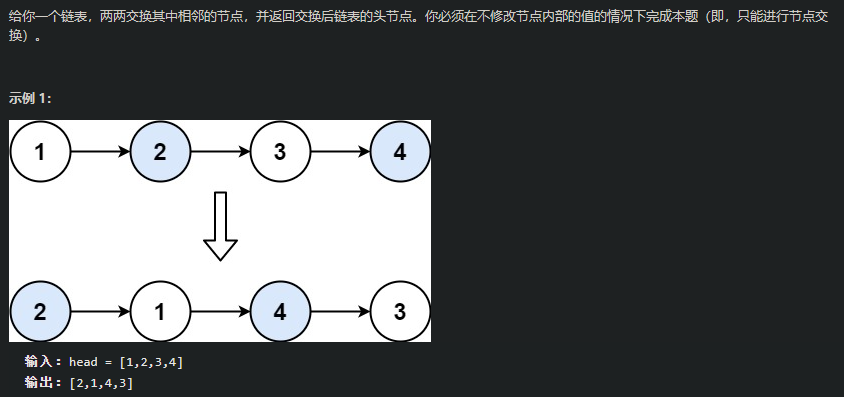

In [5]:
# 双指针，指向要互相交换的两个节点
# 虚拟头节点
def lc24(head):
    pre = ListNode(next=head)
    tmp = pre
    while tmp.next and tmp.next.next: # 首先要确保一下走两步都有值
        one,two = tmp.next,tmp.next.next

        # 交换节点
        one.next = two.next
        two.next = one
        tmp.next = two

        tmp = tmp.next.next
    return pre.next

### LC.19 [删除链表的倒数第 N 个结点](https://leetcode.cn/problems/remove-nth-node-from-end-of-list/)
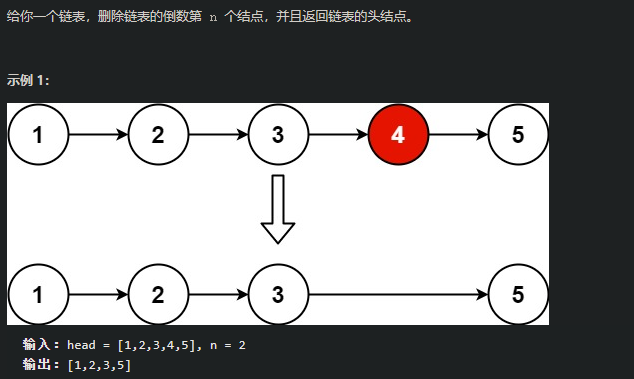

In [6]:
# 快慢指针：让快指针先走n步，当快指针指向终点的时候，慢指针的下一个即是要删除的节点
def lc19(head,n):
    # 双指针
    start = -n-1  # start用于标记慢指针什么时候开始走
    pre = ListNode(next=head)  # 其实不用虚拟头结点也可以
    tmp,tmp2 = pre,pre

    while tmp:
        start += 1
        if start > 0:
            tmp = tmp.next
            tmp2 = tmp2.next
        else:
            tmp = tmp.next  
    tmp2.next = tmp2.next.next   

    return pre.next

### LC.160 [相交链表](https://leetcode.cn/problems/intersection-of-two-linked-lists/)
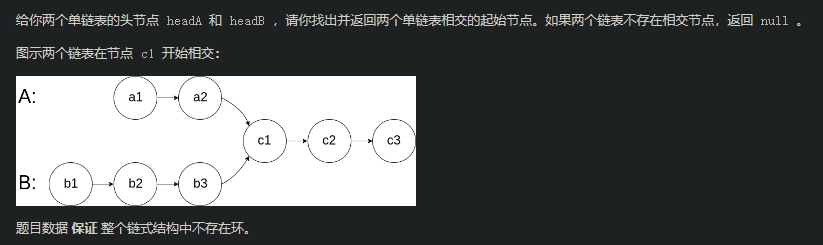

In [7]:
def lc160(headA,headB):
    # 脑筋急转弯的题
    tmp = headA
    tmp2 = headB
    count = 0
    while headA != headB:
        # A走完继续走B，B走完继续走A，如果有相交的节点一定会遇到headA == headB的情况
        if headA.next:
            headA = headA.next
        else:
            count += 1
            headA = tmp2

        if headB.next:
            headB = headB.next
        else:
            headB = tmp
        
        # 如果走了一整圈都没找到要走第二圈的话，肯定没有相交的节点
        if count == 2:
            return None

    return headA

### LC.142 [环形链表 II](https://leetcode.cn/problems/linked-list-cycle-ii/)
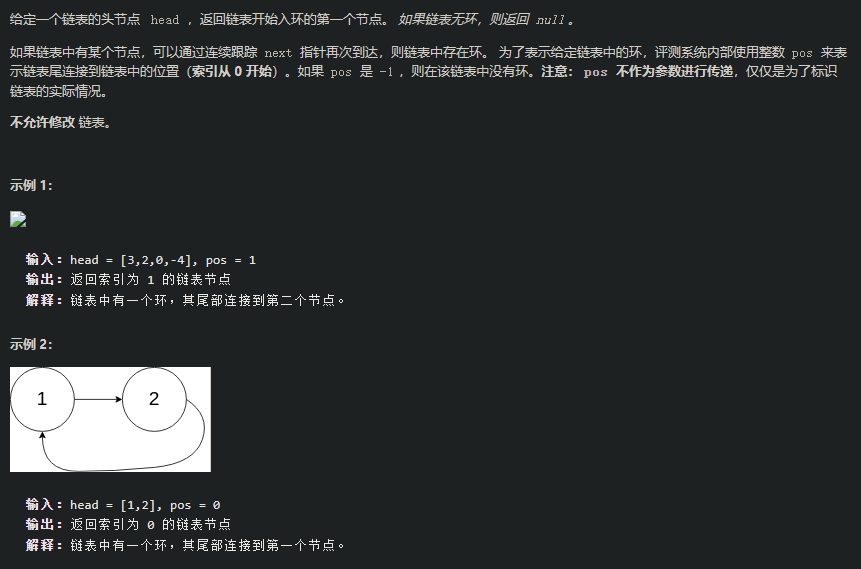

In [8]:
# 快慢指针经典应用，快指针每次走两步，慢指针每次走一步，如果有环一定会相交
# 设初始节点到相交节点距离为a，快慢指针相遇的节点到相交节点分别为b,c。因为快指针的路程是慢指针的二倍，所以可以求出a==c
def lc142(head):
    pre = ListNode(-1)
    pre.next = head
    fast,slow = pre,pre

    #无环的情况
    if not fast or not fast.next or not fast.next.next:
        return None

    fast = fast.next.next
    slow = slow.next
    while fast != slow and fast and fast.next and fast.next.next:
        fast = fast.next.next
        slow = slow.next

    # 无环的情况
    if not fast or not fast.next or not fast.next.next:
        return None

    while pre != fast:
        pre = pre.next
        fast = fast.next
    return pre

### LC.21 [合并两个有序链表](https://leetcode.cn/problems/merge-two-sorted-lists/)
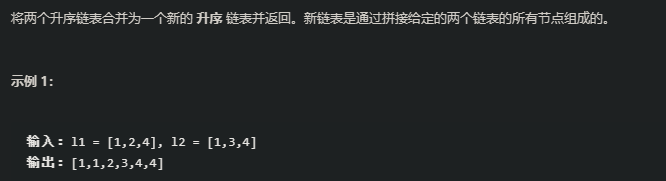

In [9]:
# 初始化一个虚拟头结点，按照两个list头结点的val大小，添加到虚拟头结点后面
def lc21(list1,list2):
    pre = ListNode()
    tmp = pre
    while list1 or list2:
        # 如果一个list添加完了
        if not list1:
            pre.next = list2
            break
        elif not list2:
            pre.next = list1
            break
        # 数值比较
        else:
            if list1.val >= list2.val:
                pre.next = list2
                list2 = list2.next
            else:
                pre.next = list1
                list1 = list1.next
            pre = pre.next
    return tmp.next

### LC.83 [删除排序链表中的重复元素](https://leetcode.cn/problems/remove-duplicates-from-sorted-list/)
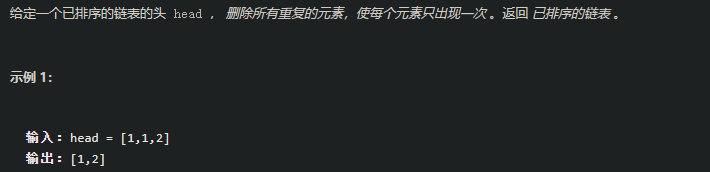

In [10]:
# 因为是排好序的，只要让当前的节点val大于之前节点的val就行
def lc83(head):
    # 快慢指针
    if not head:return head

    fast,slow = head.next,head
    while fast:
        while fast.val == slow.val: # 将连续的要删的节点一次删除
            fast = fast.next
            slow.next = fast
            if not fast: # 防止fast走到头报错
                break
        if fast:
            fast = fast.next
            slow = slow.next
    return head

### LC.445 [两数相加 II](https://leetcode.cn/problems/add-two-numbers-ii/)
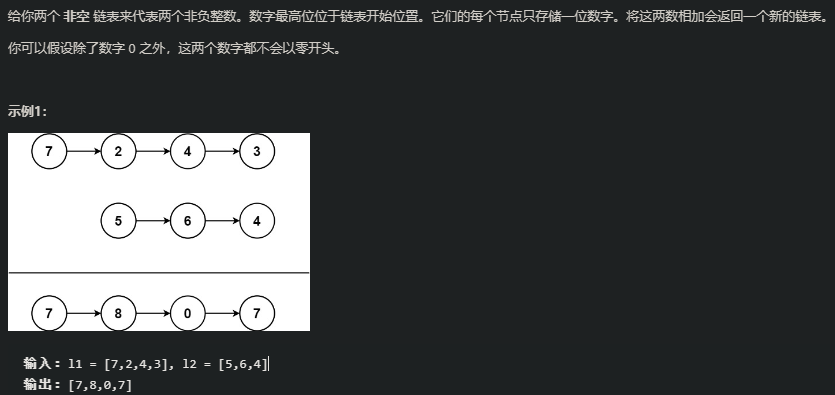

In [11]:
# 方法1：将l1,l2每个节点的值分别push到两个栈里，然后弹栈模拟
def lc445(l1,l2):
    # 利用栈
    stack1,stack2 = [],[]
    while l1:
        stack1.append(l1.val);l1=l1.next
    while l2:
        stack2.append(l2.val);l2=l2.next
    res = []
    label = 0
    while stack1 or stack2:
        if not stack1:
            node = stack2.pop()
            num,label = (node+label) % 10,(node+label) // 10
            res.append(num)
        elif not stack2:
            node = stack1.pop()
            num,label = (node+label) % 10,(node+label) // 10
            res.append(num)
        else:
            node1,node2 = stack1.pop(),stack2.pop()
            num,label = (node1+node2+label) % 10,(node1+node2+label) // 10
            res.append(num)
    if label > 0:res.append(label)
    pre = ListNode()
    tmp = pre
    while res:
        node = res.pop()
        pre.next = ListNode(val=node)
        pre = pre.next
    return tmp.next
 
# 法2：将l1,l2分别翻转过来，然后遍历每个l1,l2的节点模拟相加过程
def lc445_2(l1,l2):
    # 先翻转，然后低位到高位求和，在翻转
    def reverse(l):
        # p = ListNode(next=l)
        fast,slow = l,None
        while fast:
            tmp = fast.next
            fast.next = slow

            fast,slow = tmp,fast
        return slow

    l1,l2 = reverse(l1),reverse(l2)
    # 加法计算
    res = ListNode()
    tmp = res
    label = 0 # 进位符
    while l1 or l2:
        if not l1:
            num,label = (l2.val+label) % 10, (l2.val+label) // 10
            tmp.next = ListNode(val=num)
            tmp = tmp.next
            l2 = l2.next
        elif not l2:
            num,label = (l1.val+label) % 10, (l1.val+label) // 10
            tmp.next = ListNode(val=num)
            tmp = tmp.next
            l1 = l1.next
        else:
            num,label = (l1.val+l2.val+label) % 10, (l1.val+l2.val+label) // 10
            tmp.next = ListNode(val=num)
            tmp = tmp.next
            l2 = l2.next
            l1 = l1.next
    if label != 0:
        tmp.next = ListNode(label)
    # 将结果翻转
    return reverse(res.next)

### LC.234 [回文链表](https://leetcode.cn/problems/palindrome-linked-list/description/)
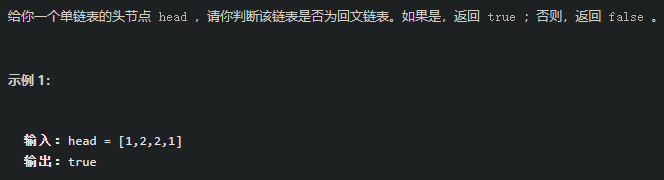

In [12]:
# 吐槽：不知道这题为啥会是easy……
# 模拟，但是要处理好节点数量是单数还是双数的情况
def lc234(head):
    # 用了栈，空间复杂度是O(n)
    length = 0
    label = 0
    tmp = head
    while tmp:
        length += 1
        tmp = tmp.next
    if length//2 == 0:
        label = 0
    else:
        label = 1
    half = length // 2
    stack = []
    while head:
        # print(half,stack,head.val)
        if half > 0 :
            stack.append(head.val)

        elif half == 0:
            if label == 1:
                if head.val == stack[-1]:
                    stack.pop()
            else:
                pass
        else:
            if not stack: return False
            if head.val == stack[-1]:
                stack.pop()
        half -= 1
        head = head.next
    return len(stack) == 0

# 法2：将原始链表切分成两个链表（也要考虑奇偶的情况），并将后面的翻转，对比是否相同（空间复杂度O(1)）
# 如何找到中点呢？ 快慢指针，快指针走两个，慢指针都一个，当快指针走到终点的时候，慢指针就可以走到中点！！！！！
# 代码参考如下
def lc234_2(head):
    if not head:
        return True
    fast = slow = head
    while fast.next and fast.next.next:
        fast = fast.next.next
        slow = slow.next
    pre = None
    cur = slow.next
    slow.next = None
    while cur:
        tmp = cur.next
        cur.next = pre
        pre = cur
        cur = tmp
    while pre:
        if head.val != pre.val:
            return False
        head = head.next
        pre = pre.next
    return True

# 作者：HarmonJiangMLE
# 链接：https://leetcode.cn/problems/palindrome-linked-list/solution/kuai-man-zhi-zhen-lian-biao-ni-xu-by-airesearcherj/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

### LC.725 [分隔链表](https://leetcode.cn/problems/split-linked-list-in-parts/description/)
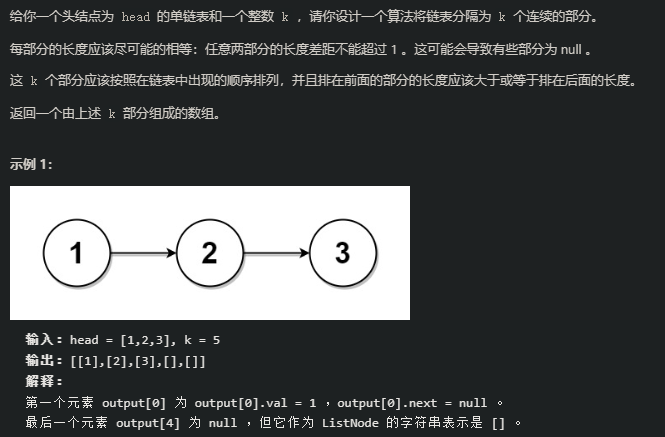

In [13]:
# 处理好前面的几个节点要多一个
# 返回值没看懂，这种第一次见
def lc725(head,k):
    l = 0
    tmp = head
    while tmp:
        l += 1
        tmp = tmp.next

    num, label = l//k, l%k # num表示一个k要有多少个节点，label表示前多少个要多加1
    res = []
    
    for j in range(k):
        if j < label:
            number = num + 1
        else:
            number = num
        t = ListNode()
        t_ = t
        for i in range(number):
            t.next = head
            head = head.next
            t = t.next
        t.next = None
        res.append(t_.next)
    return res

### LC.328 [奇偶链表](https://leetcode.cn/problems/odd-even-linked-list/)
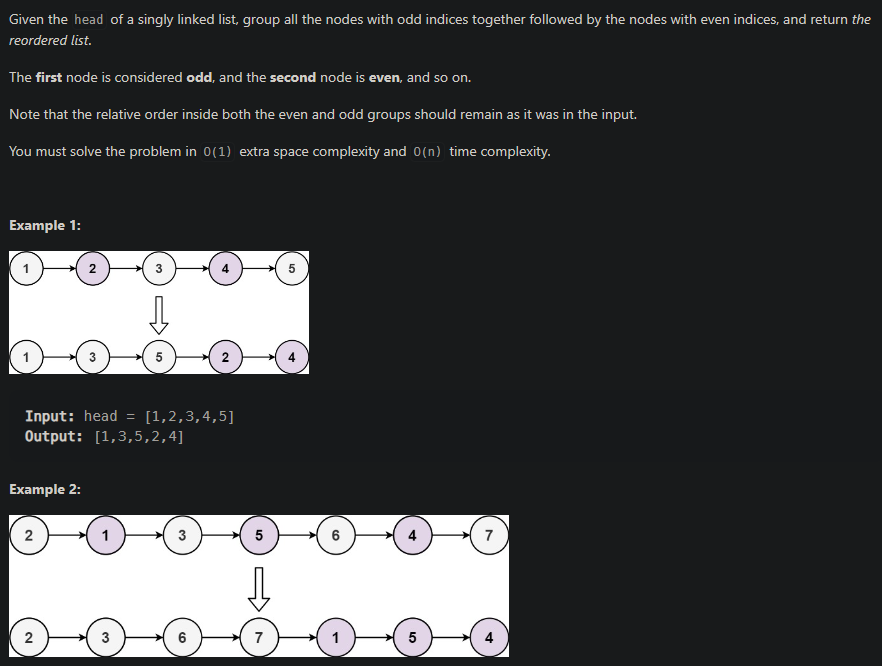

In [14]:
# 按走的步数是奇偶分别添加到odd和even,最后将even终点封上，放到odd的终点即可
def lc328(head):
    if not head or not head.next:return head 
    odd,even = head,head.next
    o, e = odd, even
    i = 1
    tmp = even.next

    # 根据奇偶聚合
    while tmp:
        if i % 2 == 1:
            odd.next = tmp
            odd = odd.next
        if i % 2 == 0:
            even.next = tmp
            even = even.next
        i += 1
        tmp = tmp.next

    # 合并到一起
    even.next = None
    odd.next = e

    return o

### LC.707 [设计链表](https://leetcode.cn/problems/design-linked-list/)
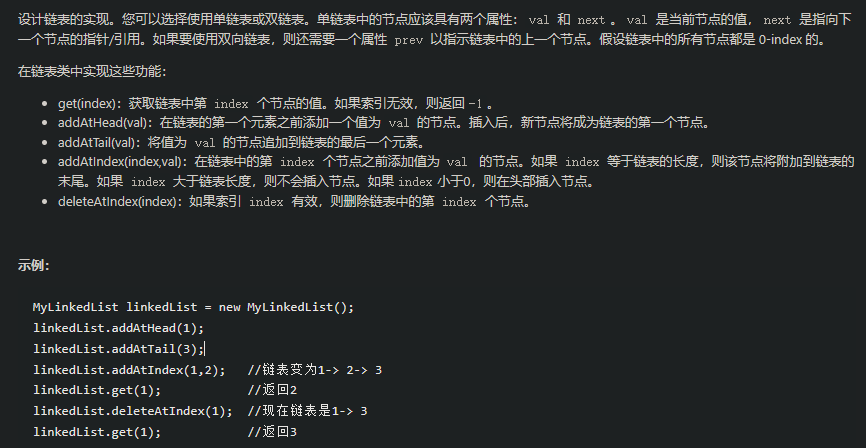

In [15]:
# addHead 和 addTail都可以调用addAtIndex来实现
class ListNode:
    def __init__(self,val=-1,nex=None):
        self.val = val
        self.next = nex

class MyLinkedList:
    def __init__(self):
        self.pre = ListNode()
        self.len = 0

    def get(self, index: int) -> int:
        if self.len <= index:
            return -1
        tmp = self.pre
        while index>0:
            tmp = tmp.next
            index -= 1
        return tmp.next.val
        
    def addAtHead(self, val: int) -> None:
        return self.addAtIndex(0,val)

    def addAtTail(self, val: int) -> None:
        return self.addAtIndex(self.len,val)

    def addAtIndex(self, index: int, val: int) -> None:
        if self.len < index:
            return -1
        else:
            tmp = self.pre
            while index>0:
                tmp = tmp.next
                index -= 1
            t = tmp.next
            tmp.next = ListNode(val,nex=t)
            self.len += 1
            # print(self.pre,index,self.len)
            return self.pre
                
    def deleteAtIndex(self, index: int) -> None:
        if self.len <= index:
            return 
        else:
            tmp = self.pre
            while index>0:
                tmp = tmp.next
                index -= 1
            
            tmp.next = tmp.next.next
            self.len -= 1